# Experiment 6


#### Problem Statement:

Implement the following CPU scheduling Algorithms.

- SJF (Non-Preemptive)
- SJTF (shortest remaining time first -Preemptive SJF)


#### Code:


In [45]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Non-Preemptive SJF


In [46]:
# function to generate Gantt chart for SJF (Shortest Job First) algorithm
def generate_sjf_gantt_chart_non_preemptive(process, burst_time):
    # Create a DataFrame
    df = pd.DataFrame({'Process': process, 'BurstTime': burst_time})
    df.sort_values('BurstTime', inplace=True)

    # Initialize variables
    current_time = 0
    gantt_chart = []

    # Simulate non-preemptive SJF scheduling
    for index, row in df.iterrows():
        proc = row['Process']
        b_time = row['BurstTime']

        # Update Gantt chart
        gantt_chart.append((proc, current_time, current_time + b_time))
        current_time += b_time

    # Generate the Gantt chart
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 1)
    for process, start, end in gantt_chart:
        ax.broken_barh([(start, end - start)], (0, 1),
                       facecolors="orange", edgecolor="black")
        ax.text((start + end) / 2, 0.5, process,
                ha='center', va='center', color="black")

    ax.set_yticks([])
    ax.set_xticks(np.arange(0, current_time + 1, 1))
    ax.set_xlabel("Time")
    plt.title("Non-Preemptive SJF Gantt Chart")
    plt.show()

In [47]:
# function to computer waiting time for SJF (Shortest Job First) algorithm
def compute_sjf_waiting_time_non_preemptive(process, burst_time):
    # create dataframe
    df = pd.DataFrame({'Process': process, 'BurstTime': burst_time, })

    # sorting the dataframe by BurstTime
    df_sorted = df.sort_values(by='BurstTime')

    df_sorted = df_sorted.reset_index(drop=True)
    df_sorted['WaitingTime'] = 0

    # computing waiting time
    for i in range(1, len(df_sorted)):
        df_sorted.loc[i, 'WaitingTime'] = df_sorted.loc[i - 1, 'BurstTime'] + \
            df_sorted.loc[i - 1, 'WaitingTime']

    # returning waiting time (dictionary of process and waiting time)
    return dict(zip(df_sorted['Process'], df_sorted['WaitingTime']))

In [48]:
# function to computer turnaround time for non-preemptive SJF (Shortest Job First) algorithm
def compute_sjf_turnaround_time_non_preemptive(process, burst_time):
    n = len(process)
    waiting_time = [0] * n
    turnaround_time = [0] * n

    # calculate waiting time
    waiting_time[0] = 0
    for i in range(1, n):
        waiting_time[i] = burst_time[i-1] + waiting_time[i-1]

    # calculate turnaround time
    for i in range(n):
        turnaround_time[i] = burst_time[i] + waiting_time[i]

    # returning turnaround time (dictionary of process and turnaround time)
    return dict(zip(process, turnaround_time))

|    | Process   |   BurstTime |
|---:|:----------|------------:|
|  0 | P1        |           6 |
|  1 | P2        |           8 |
|  2 | P3        |           7 |
|  3 | P4        |           3 |

|    | Process   |   BurstTime |
|---:|:----------|------------:|
|  3 | P4        |           3 |
|  0 | P1        |           6 |
|  2 | P3        |           7 |
|  1 | P2        |           8 |

Gantt Chart


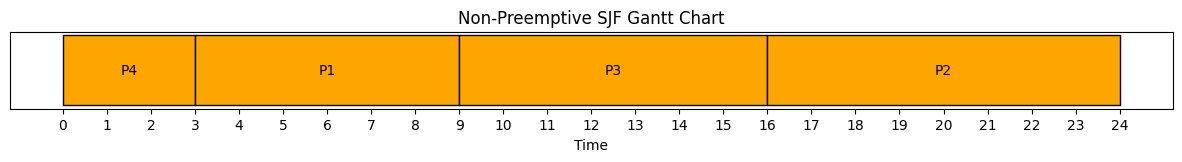

|    | Process   |   BurstTime |   WaitingTime |   TurnAroundTime |
|---:|:----------|------------:|--------------:|-----------------:|
|  0 | P1        |           6 |             0 |                6 |
|  1 | P2        |           8 |             3 |               14 |
|  2 | P3        |           7 |             9 |               21 |
|  3 | P4        |           3 |            16 |               24 |

Average Waiting Time: 7.0 milliseconds

Average Turnaround Time: 16.25 milliseconds



In [49]:
# defining process and burst time
process = ['P1', 'P2', 'P3', 'P4']
burst_time = [6, 8, 7, 3]

# creating dataframe
df = pd.DataFrame({'Process': process, 'BurstTime': burst_time})

# printing the datafram
print(df.to_markdown(), end="\n\n")

# sorting the dataframe
df = df.sort_values(by='BurstTime')
print(df.to_markdown(), end="\n\n")

# creating the Gantt chart
print("Gantt Chart")
generate_sjf_gantt_chart_non_preemptive(process, burst_time)

# computing waiting time
waiting_time = compute_sjf_waiting_time_non_preemptive(
    process, burst_time)

# computing turnaround time
turn_around_time = compute_sjf_turnaround_time_non_preemptive(
    process, burst_time)

df = pd.DataFrame({'Process': process, 'BurstTime': burst_time,
                   'WaitingTime': list(waiting_time.values()),
                   'TurnAroundTime': list(turn_around_time.values())})


# printing the dataframe
print(df.to_markdown(), end="\n\n")

# computing average waiting time
print("Average Waiting Time: ", end="")
print(df['WaitingTime'].mean(), end=" milliseconds\n\n")

# computing average turnaround time
print("Average Turnaround Time: ", end="")
print(df['TurnAroundTime'].mean(), end=" milliseconds\n\n")

#### Preemptive SJF


In [50]:
# function to generate Gantt chart for Preemptive SJF
def generate_sjf_gantt_chart_preemptive(process, arrival_time, burst_time):
    # create dataframe
    df = pd.DataFrame(
        {'Process': process, 'ArrivalTime': arrival_time, 'BurstTime': burst_time})
    df.sort_values(['ArrivalTime', 'BurstTime'], inplace=True)

    # initialize variables
    current_time = 0
    queue = []
    gantt_chart = []
    last_process = None

    # simulate SJF preemptive scheduling
    while not df.empty or queue:
        # add processes that have arrived to the queue
        arrived_processes = df[df['ArrivalTime'] <= current_time]
        queue.extend(arrived_processes.to_dict(orient='records'))
        df.drop(arrived_processes.index, inplace=True)

        # sort the queue based on BurstTime (Shortest Job First)
        queue.sort(key=lambda x: x['BurstTime'])

        if queue:
            # execute the process at the front of the queue
            current_process = queue.pop(0)

            # update Gantt chart
            if last_process == current_process['Process']:
                gantt_chart[-1] = (current_process['Process'],
                                   gantt_chart[-1][1], current_time + 1)
            else:
                gantt_chart.append(
                    (current_process['Process'], current_time, current_time + 1))

            # update current time and burst time for the running process
            current_time += 1
            current_process['BurstTime'] -= 1

            # if the process is finished, update the last process and end time
            last_process = current_process['Process']

            # if the process is not finished, add it back to the queue
            if current_process['BurstTime'] > 0:
                queue.append(current_process)

    # generate the Gantt chart
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 1)
    for process, start, end in gantt_chart:
        ax.broken_barh([(start, end - start)], (0, 1),
                       facecolors=f"orange", edgecolor="black")
        ax.text((start + end) / 2, 0.5, process,
                ha='center', va='center', color="black")

    ax.set_yticks([])
    ax.set_xticks(np.arange(0, current_time + 1, 1))
    ax.set_xlabel("Time")
    plt.title("Preemptive SJF Gantt Chart")
    plt.show()

In [51]:
# function to compute waiting time for preemptive SJF
def compute_sjf_waiting_time_preemptive(process, arrival_time, burst_time):
    # create dataframe
    df = pd.DataFrame(
        {'Process': process, 'ArrivalTime': arrival_time, 'BurstTime': burst_time})
    df.sort_values(['ArrivalTime', 'BurstTime'], inplace=True)

    # initialize variables
    current_time = 0
    queue = []
    waiting_time = {p: 0 for p in process}

    # simulating SJF preemptive scheduling
    while not df.empty or queue:
        # add processes that have arrived to the queue
        arrived_processes = df[df['ArrivalTime'] <= current_time]
        queue.extend(arrived_processes.to_dict(orient='records'))
        df.drop(arrived_processes.index, inplace=True)

        # sort the queue based on BurstTime 
        queue.sort(key=lambda x: x['BurstTime'])

        if queue:
            # execute the process at the front of the queue
            current_process = queue.pop(0)

            # update waiting time for all processes in the queue
            for q_process in queue:
                waiting_time[q_process['Process']] += 1

            # update current time and burst time for the running process
            current_time += 1
            current_process['BurstTime'] -= 1

            # if the process is not finished, add it back to the queue
            if current_process['BurstTime'] > 0:
                queue.append(current_process)

    # return waiting time (dictionary of process and waiting time)
    return waiting_time

In [52]:
def compute_sjf_turnaround_time_preemptive(process, arrival_time, burst_time):
    df = pd.DataFrame({'Process': process, 'ArrivalTime': arrival_time,
                      'BurstTime': burst_time, 'RemainingTime': burst_time})
    df.sort_values(['ArrivalTime', 'BurstTime'], inplace=True)

    current_time = 0
    queue = []
    turnaround_time = {p: 0 for p in process}

    while not df.empty or queue:
        # add processes that have arrived to the queue
        arrived_processes = df[df['ArrivalTime'] <= current_time]
        queue.extend(arrived_processes.to_dict(orient='records'))
        df.drop(arrived_processes.index, inplace=True)

        # sort the queue based on remaining time (Shortest Job First)
        queue.sort(key=lambda x: x['RemainingTime'])

        if queue:
            # execute the process at the front of the queue
            current_process = queue.pop(0)

            # update turnaround time for all processes in the queue
            for q_process in queue:
                turnaround_time[q_process['Process']] += 1

            # update current time and remaining time for the running process
            current_time += 1
            current_process['RemainingTime'] -= 1

            # if the process is not finished, add it back to the queue
            if current_process['RemainingTime'] > 0:
                queue.append(current_process)

            # update turnaround time for the current process
            turnaround_time[current_process['Process']] += 1

    # calculate turnaround time for each process
    for p in process:
        turnaround_time[p] += arrival_time[process.index(p)]

    # return turnaround time (dictionary of process and turnaround time)
    return dict(zip(process, turnaround_time.values()))

|    | Process   |   ArrivalTime |   BurstTime |
|---:|:----------|--------------:|------------:|
|  0 | P1        |             0 |           8 |
|  1 | P2        |             1 |           4 |
|  2 | P3        |             2 |           9 |
|  3 | P4        |             3 |           5 |

Gantt Chart


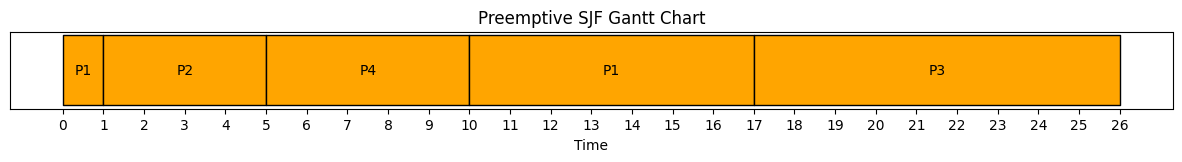

|    | Process   |   ArrivalTime |   BurstTime |   WaitingTime |   TurnAroundTime |
|---:|:----------|--------------:|------------:|--------------:|-----------------:|
|  0 | P1        |             0 |           8 |             9 |               17 |
|  1 | P2        |             1 |           4 |             0 |                5 |
|  2 | P3        |             2 |           9 |            15 |               26 |
|  3 | P4        |             3 |           5 |             2 |               10 |

Average Waiting Time: 6.5 milliseconds

Average Turnaround Time: 14.5 milliseconds



In [53]:
# defining process, arrival time and burst time
process = ['P1', 'P2', 'P3', 'P4']
arrival_time = [0, 1, 2, 3]
burst_time = [8, 4, 9, 5]

# creating dataframe
df = pd.DataFrame(
    {'Process': process, "ArrivalTime": arrival_time, 'BurstTime': burst_time})

# printing the datafram
print(df.to_markdown(), end="\n\n")

# printing the Gannt chart
print("Gantt Chart")
generate_sjf_gantt_chart_preemptive(process, arrival_time, burst_time)

# computing waiting time
waiting_time = compute_sjf_waiting_time_preemptive(
    process, arrival_time, burst_time)

# computing turnaround time
turn_around_time = compute_sjf_turnaround_time_preemptive(
    process, arrival_time, burst_time)

# creating dataframe
df = pd.DataFrame({'Process': process, 'ArrivalTime': arrival_time, 'BurstTime': burst_time,
                   'WaitingTime': list(waiting_time.values()),
                   'TurnAroundTime': list(turn_around_time.values())})

# printing the dataframe
print(df.to_markdown(), end="\n\n")

# computing average waiting time
print("Average Waiting Time: ", end="")
print(df['WaitingTime'].mean(), end=" milliseconds\n\n")

# computing average turnaround time
print("Average Turnaround Time: ", end="")
print(df['TurnAroundTime'].mean(), end=" milliseconds\n\n")